<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#store-data" data-toc-modified-id="store-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>store data</a></span></li><li><span><a href="#read-data" data-toc-modified-id="read-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>read data</a></span></li><li><span><a href="#Cut-Data--(for-speed-&amp;-optional)" data-toc-modified-id="Cut-Data--(for-speed-&amp;-optional)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Cut Data  (for speed &amp; optional)</a></span></li><li><span><a href="#clean-data" data-toc-modified-id="clean-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>clean data</a></span></li><li><span><a href="#define-MA-periods" data-toc-modified-id="define-MA-periods-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>define MA periods</a></span></li><li><span><a href="#calculate-MA" data-toc-modified-id="calculate-MA-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>calculate MA</a></span></li><li><span><a href="#calculate-ret-&amp;-ret_IC" data-toc-modified-id="calculate-ret-&amp;-ret_IC-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>calculate ret &amp; ret_IC</a></span></li></ul></li><li><span><a href="#Regression" data-toc-modified-id="Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Regression</a></span><ul class="toc-item"><li><span><a href="#drop-data" data-toc-modified-id="drop-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>drop data</a></span></li><li><span><a href="#Collinearity" data-toc-modified-id="Collinearity-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Collinearity</a></span><ul class="toc-item"><li><span><a href="#PCA" data-toc-modified-id="PCA-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>PCA</a></span></li></ul></li><li><span><a href="#Let's-regress" data-toc-modified-id="Let's-regress-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Let's regress</a></span></li><li><span><a href="#beta" data-toc-modified-id="beta-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>beta</a></span></li></ul></li><li><span><a href="#factor-value" data-toc-modified-id="factor-value-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>factor value</a></span><ul class="toc-item"><li><span><a href="#calculate-factor-values" data-toc-modified-id="calculate-factor-values-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>calculate factor values</a></span></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#IC" data-toc-modified-id="IC-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>IC</a></span></li><li><span><a href="#Turnover-rate" data-toc-modified-id="Turnover-rate-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Turnover rate</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Back-Test" data-toc-modified-id="Back-Test-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Back Test</a></span></li></ul></div>

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import datetime 
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from pandas.core import datetools
import random
import math
from scipy import stats

C:\softwares\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#used for plot
from matplotlib.ticker import Formatter
class MyFormatter(Formatter):
    def __init__(self, dates, fmt='%Y%m'):
        self.dates = dates
        self.fmt = fmt

    def __call__(self, x, pos=0):
        """Return the label for time x at position pos"""
        ind = int(np.round(x))
        if ind >= len(self.dates) or ind < 0:
            return ''

        # return self.dates[ind].strftime(self.fmt)
        return pd.to_datetime(self.dates[ind], format="%Y%m%d").strftime(self.fmt)

# Data preprocessing

## store data

In [ ]:
#data_df_fit_name = pd.read_csv('ashareeodprice20060101-20170928_v_full_members.csv')

In [ ]:
#data_df = pd.read_csv('ashareeodprice20060101-20170928.csv')

In [ ]:
# store data
#store = pd.HDFStore('data_201710_bliu.hd5')
#store['data_df_fit_name'] = data_df_fit_name
#store['data_df'] = data_df
#store.close()

## read data

In [3]:
#read data
store = pd.HDFStore('data_201710_bliu.hd5')
data_df_fit_name = store['data_df_fit_name']
data_df = store['data_df']
store.close()

In [4]:
data_df_fit_name.columns = ['trade_date', 'symbol']
#替换之后所需列的属性名
data_df.rename(columns={'S_DQ_ADJCLOSE':'close', 'S_INFO_WINDCODE':'symbol', 'TRADE_DT':'trade_date', 'S_DQ_ADJOPEN':'open'}, inplace=True)
cols_to_drop = ['S_DQ_VOLUME', 'S_DQ_ADJPRECLOSE', 'S_DQ_ADJHIGH', 'S_DQ_ADJLOW', 'S_DQ_ADJFACTOR','S_DQ_AMOUNT']
data_df.drop(cols_to_drop, axis=1, inplace=True)

## Cut Data  (for speed & optional)

In [5]:
data_df.head()

,symbol,trade_date,open,close
0,000001.SZ,20060104,153.34,157.10
1,000001.SZ,20060105,157.60,158.10
2,000001.SZ,20060106,160.10,160.35
3,000001.SZ,20060109,160.10,159.85
4,000001.SZ,20060110,158.85,157.10


In [6]:
data_df_fit_name.head()

,trade_date,symbol
0,20151225,000937.SZ
1,20161122,000937.SZ
2,20140408,000937.SZ
3,20130912,000937.SZ
4,20140702,000937.SZ


In [7]:
start_date = 20060101
end_date = 20170327
data_df = data_df.loc[(data_df['trade_date'] > start_date) & (data_df['trade_date'] < end_date)]
data_df_fit_name = data_df_fit_name.loc[(data_df_fit_name['trade_date'] > start_date) & (data_df_fit_name['trade_date'] < end_date)]

## clean data

In [8]:
#clean data
data_df0 = pd.merge(data_df_fit_name, data_df,on=('trade_date','symbol'), how='inner')

## define MA periods

In [9]:
#输入所需的时间段  
in_ = raw_input('pleas input your desired MA periods')
if in_ == "":
    in_ = ' '.join([str(i) for i in [3, 5, 10, 20, 30, 60, 90, 120, 180, 240, 270, 300]])
L = in_.split(' ')

in_ = raw_input('pleas input your desired frequency')
if in_ == "":
    in_ = 5
frequency = int(in_)
#构造均线的属性名列表
L = sorted(L)
MA = ['MA' + i for i in L]  
L = [int(j) for j in L]

print("Frequency = {}\n"
      "MA = {}\n"
      "L = {}".format(frequency, MA, L))

pleas input your desired MA periods
pleas input your desired frequency
Frequency = 5
MA = ['MA10', 'MA120', 'MA180', 'MA20', 'MA240', 'MA270', 'MA3', 'MA30', 'MA300', 'MA5', 'MA60', 'MA90']
L = [10, 120, 180, 20, 240, 270, 3, 30, 300, 5, 60, 90]


In [10]:
data_df = data_df.set_index(['symbol', 'trade_date'])
data_df = data_df.sort_index(axis=0) 

In [11]:
data_df.head()

open   close
symbol    trade_date                
000001.SZ 20060104    153.34  157.10
          20060105    157.60  158.10
          20060106    160.10  160.35
          20060109    160.10  159.85
          20060110    158.85  157.10

## calculate MA

In [12]:
#calculate MA

def roll_mean(df, ma_length=-1):
    return df.rolling(window=ma_length).mean()/df

gp = data_df.groupby('symbol')['close']

for i, ma_period in enumerate(MA):
    
    ser_ma = gp.apply(roll_mean, ma_length=int(ma_period[2:]))  ############
    data_df.loc[:, ma_period] = ser_ma    
    print("{} calculation finished.".format(ma_period))

MA10 calculation finished.
MA120 calculation finished.
MA180 calculation finished.
MA20 calculation finished.
MA240 calculation finished.
MA270 calculation finished.
MA3 calculation finished.
MA30 calculation finished.
MA300 calculation finished.
MA5 calculation finished.
MA60 calculation finished.
MA90 calculation finished.


In [13]:
data_df.head()

open   close  MA10  MA120  MA180  MA20  MA240  MA270  \
symbol    trade_date                                                           
000001.SZ 20060104    153.34  157.10   NaN    NaN    NaN   NaN    NaN    NaN   
          20060105    157.60  158.10   NaN    NaN    NaN   NaN    NaN    NaN   
          20060106    160.10  160.35   NaN    NaN    NaN   NaN    NaN    NaN   
          20060109    160.10  159.85   NaN    NaN    NaN   NaN    NaN    NaN   
          20060110    158.85  157.10   NaN    NaN    NaN   NaN    NaN    NaN   

                           MA3  MA30  MA300       MA5  MA60  MA90  
symbol    trade_date                                               
000001.SZ 20060104         NaN   NaN    NaN       NaN   NaN   NaN  
          20060105         NaN   NaN    NaN       NaN   NaN   NaN  
          20060106    0.988567   NaN    NaN       NaN   NaN   NaN  
          20060109    0.997393   NaN    NaN       NaN   NaN   NaN  
          20060110    1.012731   NaN    NaN  1.008912   NaN   NaN

## calculate ret & ret_IC

In [14]:
#calculate ret & ret_IC
def calc_ret(df, period=1):
    #TODO forward
    return df.pct_change(periods=period).shift(-period)

gp = data_df.groupby('symbol')
data_df.loc[:, 'ret'] = gp['close'].apply(calc_ret, period=frequency)
#data_df.loc[:,'ret_IC'] = gp['opening'].pct_change(periods=frequency)

In [15]:
data_df.head()

open   close  MA10  MA120  MA180  MA20  MA240  MA270  \
symbol    trade_date                                                           
000001.SZ 20060104    153.34  157.10   NaN    NaN    NaN   NaN    NaN    NaN   
          20060105    157.60  158.10   NaN    NaN    NaN   NaN    NaN    NaN   
          20060106    160.10  160.35   NaN    NaN    NaN   NaN    NaN    NaN   
          20060109    160.10  159.85   NaN    NaN    NaN   NaN    NaN    NaN   
          20060110    158.85  157.10   NaN    NaN    NaN   NaN    NaN    NaN   

                           MA3  MA30  MA300       MA5  MA60  MA90       ret  
symbol    trade_date                                                         
000001.SZ 20060104         NaN   NaN    NaN       NaN   NaN   NaN -0.007957  
          20060105         NaN   NaN    NaN       NaN   NaN   NaN -0.006325  
          20060106    0.988567   NaN    NaN       NaN   NaN   NaN -0.031182  
          20060109    0.997393   NaN    NaN       NaN   NaN   NaN -0.046982  
          20060110    1.012731   NaN    NaN  1.008912   NaN   NaN -0.022342

# Regression

## drop data

In [16]:
cols_to_drop = list(set(data_df.columns) - set(MA + ['ret']))
data_reg = data_df.drop(cols_to_drop, axis=1)  #dataframe used for regression
print data_reg.shape
data_reg.head()

(5736619, 13)


MA10  MA120  MA180  MA20  MA240  MA270       MA3  MA30  \
symbol    trade_date                                                           
000001.SZ 20060104     NaN    NaN    NaN   NaN    NaN    NaN       NaN   NaN   
          20060105     NaN    NaN    NaN   NaN    NaN    NaN       NaN   NaN   
          20060106     NaN    NaN    NaN   NaN    NaN    NaN  0.988567   NaN   
          20060109     NaN    NaN    NaN   NaN    NaN    NaN  0.997393   NaN   
          20060110     NaN    NaN    NaN   NaN    NaN    NaN  1.012731   NaN   

                      MA300       MA5  MA60  MA90       ret  
symbol    trade_date                                         
000001.SZ 20060104      NaN       NaN   NaN   NaN -0.007957  
          20060105      NaN       NaN   NaN   NaN -0.006325  
          20060106      NaN       NaN   NaN   NaN -0.031182  
          20060109      NaN       NaN   NaN   NaN -0.046982  
          20060110      NaN  1.008912   NaN   NaN -0.022342

In [17]:
print(data_reg.shape)
mask_to_drop = np.any(data_reg.isnull(), axis=1)
print("{:.1f}% of data are droped because of all NaN.".format(mask_to_drop.sum() * 100. / mask_to_drop.shape[0]))
data_reg = data_reg.loc[~mask_to_drop]

print(data_reg.shape)

(5736619, 13)
15.7% of data are droped because of all NaN.
(4836144, 13)


In [18]:
data_reg.head()

MA10     MA120     MA180      MA20     MA240  \
symbol    trade_date                                                     
000001.SZ 20070403    0.998031  0.754474  0.627840  0.978858  0.570560   
          20070404    0.970932  0.738903  0.614195  0.955497  0.557880   
          20070405    0.967579  0.741019  0.615452  0.954804  0.558684   
          20070406    0.987840  0.760425  0.631089  0.975398  0.572516   
          20070409    0.983170  0.759306  0.629675  0.971330  0.570906   

                         MA270       MA3      MA30     MA300       MA5  \
symbol    trade_date                                                     
000001.SZ 20070403    0.544156  0.990697  0.984198  0.522404  0.989658   
          20070404    0.531775  0.980726  0.956368  0.510500  0.970934   
          20070405    0.532350  0.988644  0.952098  0.510989  0.975550   
          20070406    0.545372  1.012100  0.968984  0.523418  1.002051   
          20070409    0.543657  1.001527  0.960790  0.521692  0.998893   

                          MA60      MA90       ret  
symbol    trade_date                                
000001.SZ 20070403    0.930873  0.843314  0.048569  
          20070404    0.910139  0.825785  0.070383  
          20070405    0.911834  0.828017  0.119725  
          20070406    0.935557  0.848920  0.199285  
          20070409    0.933812  0.846320  0.203345

In [19]:
gp = data_reg.groupby('trade_date')

In [20]:
#number of stocks for every day's regression
num_cal_factor = gp.apply(len) 

## Collinearity

In [21]:
def test_collinear(df, col):
    return np.linalg.cond(df.loc[:,col])

In [22]:
gp.apply(test_collinear, MA) #界限是30

trade_date
20070403    2490.931195
20070404    2502.253637
20070405    2509.558486
20070406    2511.994195
20070409    2516.774370
20070410    2535.153370
20070411    2548.729055
20070412    2563.080789
20070413    2587.600585
20070416    2591.573558
20070417    2593.223143
20070418    2595.996263
20070419    2577.845528
20070420    2531.982518
20070423    2484.454388
20070424    2435.283987
20070425    2380.194549
20070426    2316.272362
20070427    2261.419850
20070430    2199.700247
20070508    2136.868913
20070509    2073.606729
20070510    2007.733839
20070511    1936.293738
20070514    1884.371928
20070515    1840.973322
20070516    1790.054611
20070517    1756.359212
20070518    1739.209257
20070521    1722.338131
               ...     
20170206     872.723746
20170207     848.195062
20170208     910.857051
20170209     944.862569
20170210     956.302027
20170213     903.559083
20170214     923.494859
20170215     951.518182
20170216     931.237917
20170217     900.637368
20170

### PCA

In [23]:
from sklearn.decomposition import PCA

def unify(df):
    """unify return"""
    
    arr = df.values
    return arr / np.linalg.norm(arr)
            
def PCA_var_reg(df, ma_cols_names=MA, n=1, reg=False):
    
    """
    df
    ma_cols_names: attributes
    n: components
    if reg == False then we just analyze 
    else we do the regression based on the result of decomposition
    return : dataframe columns[:-1] are attri, columns[-1] is return
    """
    x = df.loc[:, ma_cols_names]
    pca = PCA(n_components=n)
    
    pca.fit(x)
    if reg == False:
        return pca.explained_variance_ratio_
    else:
        xr = pca.fit_transform(x)
        xr = np.vstack(xr)
        yr = unify(df.ret)  # adjust it's dimension
        yr = np.reshape(yr,(-1,1))
        return pd.DataFrame(data=np.hstack([xr,yr]),index=df.index.get_level_values(level=0))


In [24]:
var_ratio0 = gp.apply(PCA_var_reg, ma_cols_names=MA, n=len(MA))
print type(var_ratio0)
var_ratio = pd.DataFrame(data=np.vstack(var_ratio0.values)*100)
var_ratio.head()

<class 'pandas.core.series.Series'>


,0,1,2,3,4,5,6,7,8,9,10,11
0,83.592099,10.492616,4.092868,0.828882,0.469108,0.216192,0.140758,0.067677,0.043992,0.036506,0.017788,0.001514
1,83.532445,10.349486,4.239408,0.881326,0.483395,0.198317,0.147298,0.067360,0.043808,0.037351,0.018289,0.001516
2,84.258526,9.870225,4.047110,0.883702,0.443034,0.180934,0.149325,0.068256,0.045393,0.034083,0.017929,0.001483
3,84.439005,9.383888,4.343139,0.940722,0.411686,0.169910,0.145138,0.072466,0.044735,0.030318,0.017559,0.001434
4,85.027214,8.861465,4.329721,0.917852,0.397206,0.168136,0.135453,0.071476,0.042883,0.030284,0.016944,0.001365


In [25]:
#data for regression based on PCA
#data_reg_pca = gp.apply(PCA_var_reg, ma_cols_names=MA, n=len(MA)-2, reg=True)  #单位化的结果，用于pca回归的数据
#data_reg_pca.head()

## Let's regress 

In [25]:
def regress_one_day(df, data_clear=True):
    if data_clear:
        x = df.iloc[:, :-1]#.values
        y = df.iloc[:, -1]#.values
        x = sm.add_constant(x)
        model = sm.RLM(y, x)
        fit_res = model.fit()

        ser = fit_res.params.copy()
        #ser.loc['rsq'] = fit_res.rsquared
        #ser.loc['rsq_adj'] = fit_res.rsquared_adj
        #ser.loc['cond_num'] = fit_res.condition_number
        return ser
    else:
        print "please clean your data"
        return None

In [26]:
def reg(met='normal'):
    """df is the DataFrame used for regression
       met represent what kind of data belongs to: met = {'normal','pca'}"""
    
    if met == 'normal':
        df = data_reg
    if met == 'pca':
        df = data_reg_pca
    
    return df.groupby('trade_date').apply(regress_one_day)
    
    
####选择回归的形式

In [27]:
#normal
df_reg_res =  reg(met='normal')#回归结果
df_reg_res.head()

,const,MA10,MA120,MA180,MA20,MA240,MA270,MA3,MA30,MA300,MA5,MA60,MA90
trade_date,,,,,,,,,,,,,
20070403,0.053701,-0.405235,-0.788646,0.016966,-0.120366,-0.557816,2.243950,0.098946,0.435526,-1.483647,0.215035,-0.103511,0.405729
20070404,-0.448718,0.031478,-0.566670,-0.458467,-0.500040,-0.259042,2.254267,1.394029,0.692696,-1.540811,-0.856521,-0.227075,0.489780
20070405,0.388741,0.187445,-0.315428,-0.569842,-0.733702,0.002567,1.624028,-0.329717,0.784282,-1.172654,0.012185,-0.243580,0.383339
20070406,0.140922,-0.014151,0.525999,-0.592374,-0.225730,-0.623235,2.218356,-0.088611,0.386901,-1.323017,0.011296,-0.063127,-0.328163
20070409,-0.022992,-0.586734,0.680687,-0.589980,0.530919,-0.564620,1.729501,0.049613,-0.086522,-0.923467,0.279060,0.035084,-0.481709


In [28]:
#pca
#df_reg_res_pca = reg(met='pca')
#df_reg_res_pca.head()

## beta

In [29]:
def rolling_beta(df, window):
    'calcu rolling mean with different window'
    return df.rolling(window=12).mean()


def beta_pre(met='normal'):
    """return
       beta: the coef of regression model
       beta_predict_shift: the predicted beta used for predict ret"""

    if met == 'normal':
        df = df_reg_res
    if met == 'pca':
        df = df_reg_res_pca
    
    beta = pd.concat([df.iloc[:,1:], df.iloc[:,1]], axis=1)
    beta_predict = beta.copy()
    beta_predict.loc[:,'mod'] = np.mod(beta.index.values, frequency)
    beta_predict = beta_predict.groupby('mod').apply(rolling_beta,window=25).drop('mod',axis=1)
    beta_predict_shift = beta_predict.shift(frequency)  
    beta_predict_shift = beta_predict_shift.dropna(how='all',axis=0) #increase the relativity，reduce the turnover rate
    return beta, beta_predict_shift

In [30]:
def plot_beta(beta, beta_predict_shift):

    plt.figure(figsize=(16,12))

    plt.subplot(2,1,1)
    plt.plot(beta.values, lw=1.2, alpha=1)
    plt.gca().xaxis.set_major_formatter(MyFormatter(beta.index, '%Y-%m'))
    plt.title('beta_coef')

    plt.subplot(2,1,2)
    plt.plot(beta_predict_shift.values, lw=1.2, alpha=1)
    plt.gca().xaxis.set_major_formatter(MyFormatter(beta_predict_shift.index, '%Y-%m'))
    plt.title('predicted beta')

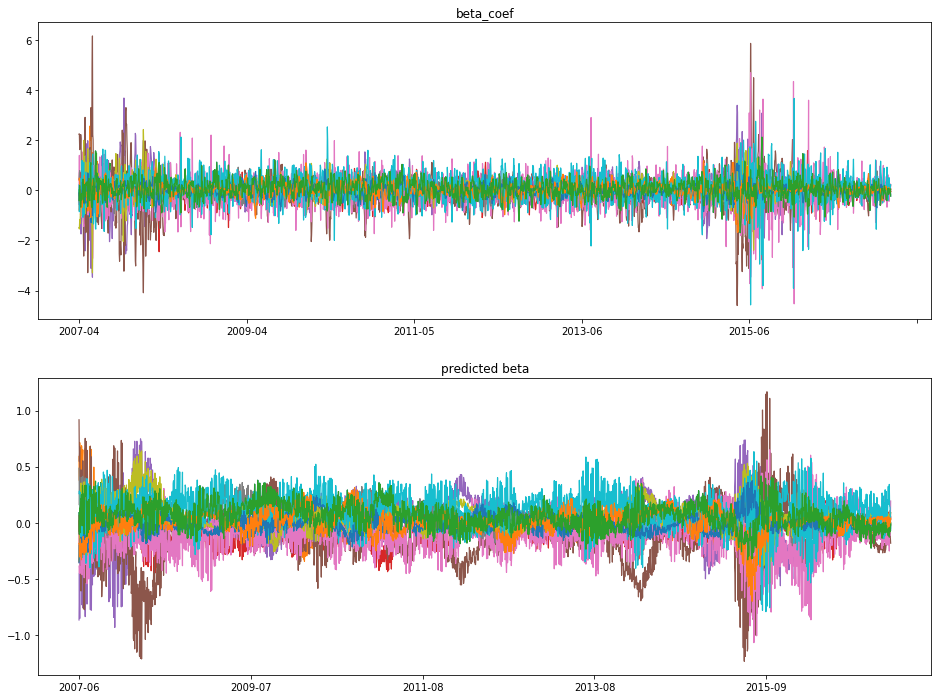

In [31]:
#normal
[beta_normal, beta_predict_shift_normal] = beta_pre(met='normal')
plot_beta(beta_normal, beta_predict_shift_normal)

In [33]:
#pca
#[beta_pca, beta_predict_shift_pca] = beta_pre(met='pca')
#plot_beta(beta_pca, beta_predict_shift_pca)

In [34]:
#pca.inverse_transform(beta_pca)

# factor value

## calculate factor values

In [32]:
def cal_fac_values(df=data_reg, beta_predict_shift=beta_predict_shift_normal):
        
    initial = beta_predict_shift.index[0]
    df_factor = df.iloc[:,:-1]
    df_factor.loc[:, 'const'] = 1   #df used for cal factor (MA)
    factor_gp = df_factor.groupby('trade_date')
    In = beta_predict_shift.index
    factor_values = pd.DataFrame()

    for time, dff in factor_gp:
        if time < initial or time not in In:
            continue
        ret_pred = pd.DataFrame(data=np.dot(dff.values, beta_predict_shift.loc[time,:].values), index=dff.index)
        if factor_values.empty:
            factor_values = ret_pred
        else:
            factor_values = pd.concat([factor_values,ret_pred])
        
    factor_values.columns = ['factor']
    return factor_values

In [33]:
#normal 
factor_values_normal = cal_fac_values()

In [34]:
factor_values_normal.head()

,,factor
symbol,trade_date,
000001.SZ,20070627,0.013579
000002.SZ,20070627,0.037728
000004.SZ,20070627,0.043876
000005.SZ,20070627,-0.000095
000006.SZ,20070627,0.022109


In [40]:
#pca
#factor_values_pca = cal_fac_values(df=data_reg_pca, beta_predict_shift=beta_predict_shift_pca)

In [41]:
#factor_values_pca.head()

# Evaluation

## IC

In [150]:
def calcu_ic(df):
    return  stats.spearmanr(df['factor'], df['ret'])[0]

def switch_frequency(frequency=5):
    switcher = {
        1:365,
        5: 52,
        22: 12
    }
    return switcher.get(frequency)

def ic(factor_values, df=data_df):
    """data_df is an original dataframe without any dropping"""
    ic_df = pd.merge(left=factor_values, right=df.loc[:,['ret']],how='inner', left_index=True, right_index=True)
    ic_gp = ic_df.groupby('trade_date')
    ic = ic_gp.apply(calcu_ic)
    
    #ic's statistsc attri
    ic_mean = np.mean(ic.values)  #mean
    ic_std = np.std(ic.values)    #std
    #ir = (ic_mean/ic_std) * np.sqrt(switch_frequency(frequency))   #IR
    print("mean of ic is {}\n"
          "std of ic is {}\n".format(ic_mean, ic_std))
    
    ic_attr = pd.DataFrame(data=ic,index=ic.index, columns = ['ic'])
    ic_attr.loc[:,'cumsum'] = ic_attr.ic.cumsum()   #cumsum
    return ic_attr

In [151]:
#normal
ic_normal = ic(factor_values_normal)

mean of ic is 0.0551282540029
std of ic is 0.129660445395



In [37]:
factor_values_normal.head()

,,factor
symbol,trade_date,
000001.SZ,20070627,0.013579
000002.SZ,20070627,0.037728
000004.SZ,20070627,0.043876
000005.SZ,20070627,-0.000095
000006.SZ,20070627,0.022109


In [38]:
#factor_values_pca = factor_values_pca.swaplevel(i=0,j=1)

In [39]:
#pca
#ic_pca = ic(factor_values_pca)

## Turnover rate

In [40]:
def turnover_rate(factor_values=factor_values_normal):
    """return
      first one : turnover rate
      time_corr: correlation of time series"""
    mid = factor_values.groupby('symbol').apply(rolling_beta, window=frequency)
    mid.dropna(inplace=True)
    turnover_df = mid.unstack(level=0).T.reset_index(level=0,drop=True).T
    index_list = turnover_df.index[1:]
    time_corr = pd.Series(index=index_list)
    j = 0

    for i in range(1,len(time_corr)):
        df = turnover_df.iloc[[j,i],:]
        df.dropna(axis=1, inplace=True)
        time_corr[index_list[i]] = stats.spearmanr(df, axis=1)[0]
        j = i
    
    time_corr_mean = np.mean(time_corr.dropna().values)
    turnover = np.sqrt((1-time_corr_mean)/2)
    print("the approximate daily rate of turnover is {:.3f}.".format(turnover))
    return turnover, time_corr

In [41]:
#normal
[turnover_normal, time_corr_normal] = turnover_rate()

C:\softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


the approximate daily rate of turnover is 0.085.


In [42]:
#pca
#[turnover_pca, time_corr_pca] = turnover_rate(factor_values_pca)

# Summary

In [43]:
def summary_plot(ic, time_corr):
    plt.figure(figsize=(16,12))
    plt.subplot(3,1,1)
    plt.plot(ic['cumsum'].values, lw=1.2, alpha=1)
    plt.gca().xaxis.set_major_formatter(MyFormatter(ic.index, '%Y-%m'))
    plt.title('Weekly Cumsum')

    plt.subplot(3,1,2)
    plt.plot(num_cal_factor.values, lw=1.2, alpha=1)
    plt.gca().xaxis.set_major_formatter(MyFormatter(num_cal_factor.index, '%Y-%m'))
    plt.title('Number of stocks used for cal IC')

    plt.subplot(3,1,3)
    plt.plot(time_corr.values,lw=1.2, alpha=1)
    plt.gca().xaxis.set_major_formatter(MyFormatter(ic.index, '%Y-%m'))
    plt.title('time correlation')
    plt.savefig('IC_{}.pdf')


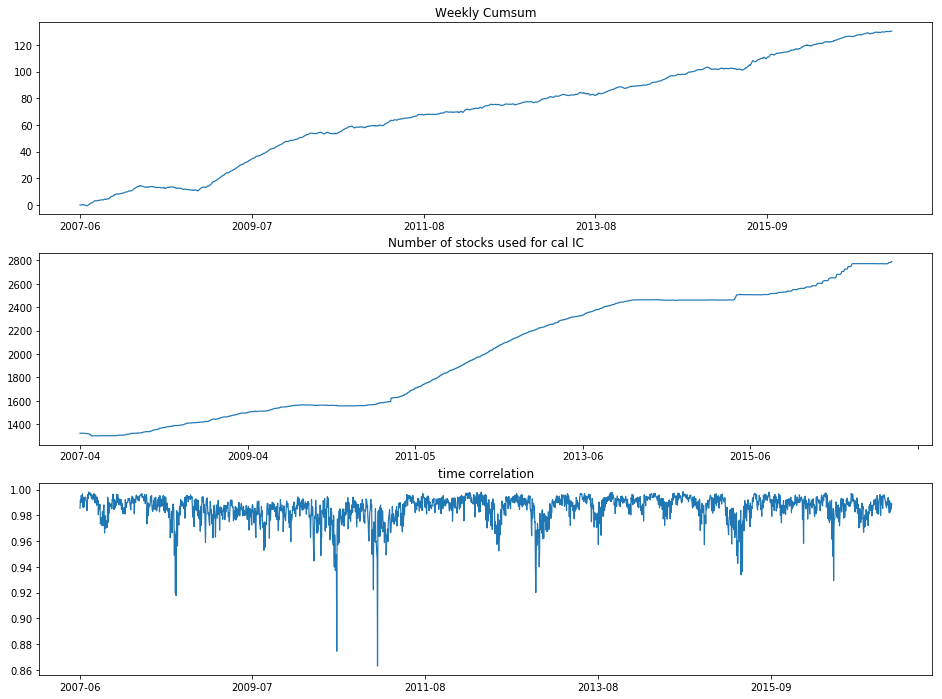

In [44]:
#normal
summary_plot(ic_normal, time_corr_normal)

In [53]:
#pca
#summary_plot(ic_pca, time_corr_pca)

# Back Test

In [139]:
test = factor_values_normal.iloc[:, 0].unstack(level=0) #transform it to series
test.head()

symbol,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,603968.SH,603969.SH,603979.SH,603988.SH,603989.SH,603993.SH,603996.SH,603997.SH,603998.SH,603999.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20070627,0.013579,0.037728,0.043876,-0.000095,0.022109,0.056018,0.052124,0.027205,0.029316,0.032088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20070628,-0.282858,-0.270369,-0.288214,-0.285059,-0.286185,-0.281591,-0.284097,-0.280548,-0.294582,-0.276522,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20070702,0.120657,0.108537,0.105117,0.062850,0.094638,0.116737,0.111079,0.084803,0.078724,0.087253,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20070703,-0.256384,-0.248622,-0.276322,-0.278484,-0.253909,-0.283399,-0.271832,-0.273851,-0.297593,-0.284552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20070705,0.173880,0.167343,0.154095,0.139304,0.155908,0.164311,0.150099,0.157817,0.150175,0.164507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
test.index

Int64Index([20070627, 20070628, 20070702, 20070703, 20070705, 20070706,
            20070710, 20070711, 20070712, 20070713,
            ...
            20170306, 20170307, 20170308, 20170309, 20170310, 20170313,
            20170314, 20170315, 20170316, 20170317],
           dtype='int64', name=u'trade_date', length=2363)

In [1]:

from jaqs.data import RemoteDataService
from jaqs.trade import AlphaBacktestInstance

import jaqs.util as jutil
from jaqs.trade import PortfolioManager
import jaqs.trade.analyze as ana
from jaqs.trade import AlphaStrategy
from jaqs.trade import AlphaTradeApi
from jaqs.trade import model
from jaqs.data import DataView

In [2]:
data_config = {
  "remote.data.address": "tcp://data.tushare.org:8910",
  "remote.data.username": "15905176662",
  "remote.data.password": "yyy141110101"
}


In [3]:
dataview_dir_path = 'ma_factor/dataview'
backtest_result_dir_path = 'ma_factor'

In [104]:
ds = RemoteDataService()
ds.init_from_config(data_config)
dv = DataView()

props = {'start_date': 20120101, 'end_date': 20171001, 'universe': '000905.SH',
         'fields': ('volume,turnover,sw2'),
         'freq': 1}

dv.init_from_config(props, ds)
dv.prepare_data()

dv.save_dataview(folder_path=dataview_dir_path)




Begin: DataApi login 15905176662@tcp://data.tushare.org:8910
    Already login as 15905176662, skip init_from_config
Initialize config success.
Query data...
Query data - query...
NOTE: price adjust method is [post adjust]
Query data - daily fields prepared.
Query instrument info...
Query adj_factor...
Query benchmark...
Query benchmar member info...
Query groups (industry)...
Data has been successfully prepared.

Store data...
Dataview has been successfully saved to:
C:\bingnliu\git_repo\trend_factor\ma_factor\dataview

You can load it with load_dataview('C:\bingnliu\git_repo\trend_factor\ma_factor\dataview')


In [149]:
dv.save_dataview(folder_path=dataview_dir_path)



Store data...
Dataview has been successfully saved to:
C:\bingnliu\git_repo\trend_factor\ma_factor\dataview

You can load it with load_dataview('C:\bingnliu\git_repo\trend_factor\ma_factor\dataview')


In [5]:
dv = DataView()
dv.load_dataview(dataview_dir_path)

Dataview loaded successfully.


In [141]:
test_dv = test.loc[dv.start_date: , dv.symbol]
test_dv.head()

symbol,000005.SZ,000006.SZ,000008.SZ,000012.SZ,000016.SZ,000021.SZ,000025.SZ,000027.SZ,000028.SZ,000029.SZ,...,603766.SH,603799.SH,603806.SH,603816.SH,603866.SH,603868.SH,603877.SH,603883.SH,603888.SH,603899.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20120104,-0.108260,-0.107909,-0.104008,-0.110830,-0.101881,-0.099114,-0.110567,-0.107951,-0.110482,-0.106960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20120105,0.000452,-0.009103,-0.015017,-0.015874,-0.002544,-0.004504,-0.016569,-0.003354,-0.012242,-0.009546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20120106,-0.074253,-0.081394,-0.083332,-0.083750,-0.077843,-0.075445,-0.085407,-0.077340,-0.090133,-0.079965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20120109,-0.245869,-0.246725,-0.237420,-0.243141,-0.241063,-0.236537,-0.241697,-0.244017,-0.245281,-0.241767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20120110,-0.243899,-0.239710,-0.227092,-0.232091,-0.233200,-0.227352,-0.228067,-0.241434,-0.231311,-0.236134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
dv.append_df(test_dv, 'y_pred', is_quarterly=False)

In [143]:
dv.add_formula('y_pred_rank', 'Rank(y_pred)', is_quarterly=False)
dv.get_ts('y_pred_rank').head()

symbol,000005.SZ,000006.SZ,000008.SZ,000012.SZ,000016.SZ,000021.SZ,000025.SZ,000027.SZ,000028.SZ,000029.SZ,...,603766.SH,603799.SH,603806.SH,603816.SH,603866.SH,603868.SH,603877.SH,603883.SH,603888.SH,603899.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20120104,NaN,0.523596,NaN,NaN,NaN,NaN,NaN,NaN,0.323596,0.584270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20120105,NaN,0.464066,NaN,NaN,NaN,NaN,NaN,NaN,0.264887,0.433265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20120106,NaN,0.379877,NaN,NaN,NaN,NaN,NaN,NaN,0.043121,0.519507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20120109,NaN,0.106557,NaN,NaN,NaN,NaN,NaN,NaN,0.176230,0.481557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20120110,NaN,0.194672,NaN,NaN,NaN,NaN,NaN,NaN,0.774590,0.444672,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
dv.add_formula('top20pct', 'y_pred_rank >= 0.8', is_quarterly=False)
dv.get_ts('top20pct').head()

symbol,000005.SZ,000006.SZ,000008.SZ,000012.SZ,000016.SZ,000021.SZ,000025.SZ,000027.SZ,000028.SZ,000029.SZ,...,603766.SH,603799.SH,603806.SH,603816.SH,603866.SH,603868.SH,603877.SH,603883.SH,603888.SH,603899.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20120104,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20120105,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20120106,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20120109,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20120110,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def my_selector(context, user_options=None):
    buy = context.snapshot['top20pct']
    return buy

props = {
    "benchmark": "000905.SH",
    "universe": ','.join(dv.symbol),

    "start_date": 20140101,
    "end_date": 20170101,

    "period": "week",
    "days_delay": 0,

    "init_balance": 1e8,
    "position_ratio": 1.0,
}
props.update(data_config)
# props.update(trade_config)

trade_api = AlphaTradeApi()

stock_selector = model.StockSelector()
stock_selector.add_filter(name='top20pct', func=my_selector)

strategy = AlphaStrategy(stock_selector=stock_selector, pc_method='equal_weight')
pm = PortfolioManager()

bt = AlphaBacktestInstance()

context = model.Context(dataview=dv, instance=bt, strategy=strategy, trade_api=trade_api, pm=pm)
stock_selector.register_context(context)

bt.init_from_config(props)
bt.run_alpha()

bt.save_results(folder_path=backtest_result_dir_path)


AlphaStrategy Initialized.

=======new day 20140102
Before 20140102 re-balance: available cash all (exclude suspensions) = 1.0000e+08

=======new day 20140106
Before 20140106 re-balance: available cash all (exclude suspensions) = 9.5863e+07

=======new day 20140113
Before 20140113 re-balance: available cash all (exclude suspensions) = 9.1974e+07

=======new day 20140120
Before 20140120 re-balance: available cash all (exclude suspensions) = 9.3569e+07

=======new day 20140127
Before 20140127 re-balance: available cash all (exclude suspensions) = 1.0117e+08

=======new day 20140207
Before 20140207 re-balance: available cash all (exclude suspensions) = 1.0283e+08

=======new day 20140210
Before 20140210 re-balance: available cash all (exclude suspensions) = 1.0637e+08

=======new day 20140217
Before 20140217 re-balance: available cash all (exclude suspensions) = 1.1135e+08

=======new day 20140224
Before 20140224 re-balance: available cash all (exclude suspensions) = 1.0878e+08

=======ne

Before 20150623 re-balance: available cash all (exclude suspensions) = 2.6883e+08

=======new day 20150629
Before 20150629 re-balance: available cash all (exclude suspensions) = 2.2997e+08

=======new day 20150706
Before 20150706 re-balance: available cash all (exclude suspensions) = 2.0192e+08

=======new day 20150713
Before 20150713 re-balance: available cash all (exclude suspensions) = 2.1537e+08

=======new day 20150720
Before 20150720 re-balance: available cash all (exclude suspensions) = 2.2905e+08

=======new day 20150727
Before 20150727 re-balance: available cash all (exclude suspensions) = 2.2316e+08

=======new day 20150803
Before 20150803 re-balance: available cash all (exclude suspensions) = 2.1495e+08

=======new day 20150810
Before 20150810 re-balance: available cash all (exclude suspensions) = 2.3815e+08

=======new day 20150817
Before 20150817 re-balance: available cash all (exclude suspensions) = 2.4957e+08

=======new day 20150824
Before 20150824 re-balance: available

Before 20161226 re-balance: available cash all (exclude suspensions) = 2.0588e+08
Backtest done. 1438 days, 2.31e+04 trades in total.
Backtest results has been successfully saved to:
C:\bingnliu\git_repo\trend_factor\ma_factor


In [8]:
ta = ana.AlphaAnalyzer()

ta.initialize(dataview=dv, file_folder=backtest_result_dir_path)

ta.do_analyze(result_dir=backtest_result_dir_path, selected_sec=list(ta.universe)[:3])


process trades...
get daily stats...
calc strategy return...
Plot single securities PnL
Plot strategy PnL...
generate report...
HTML report: C:\bingnliu\git_repo\trend_factor\ma_factor\report.html


In [18]:
ta.plot_pnl('.')

In [19]:
import PIL

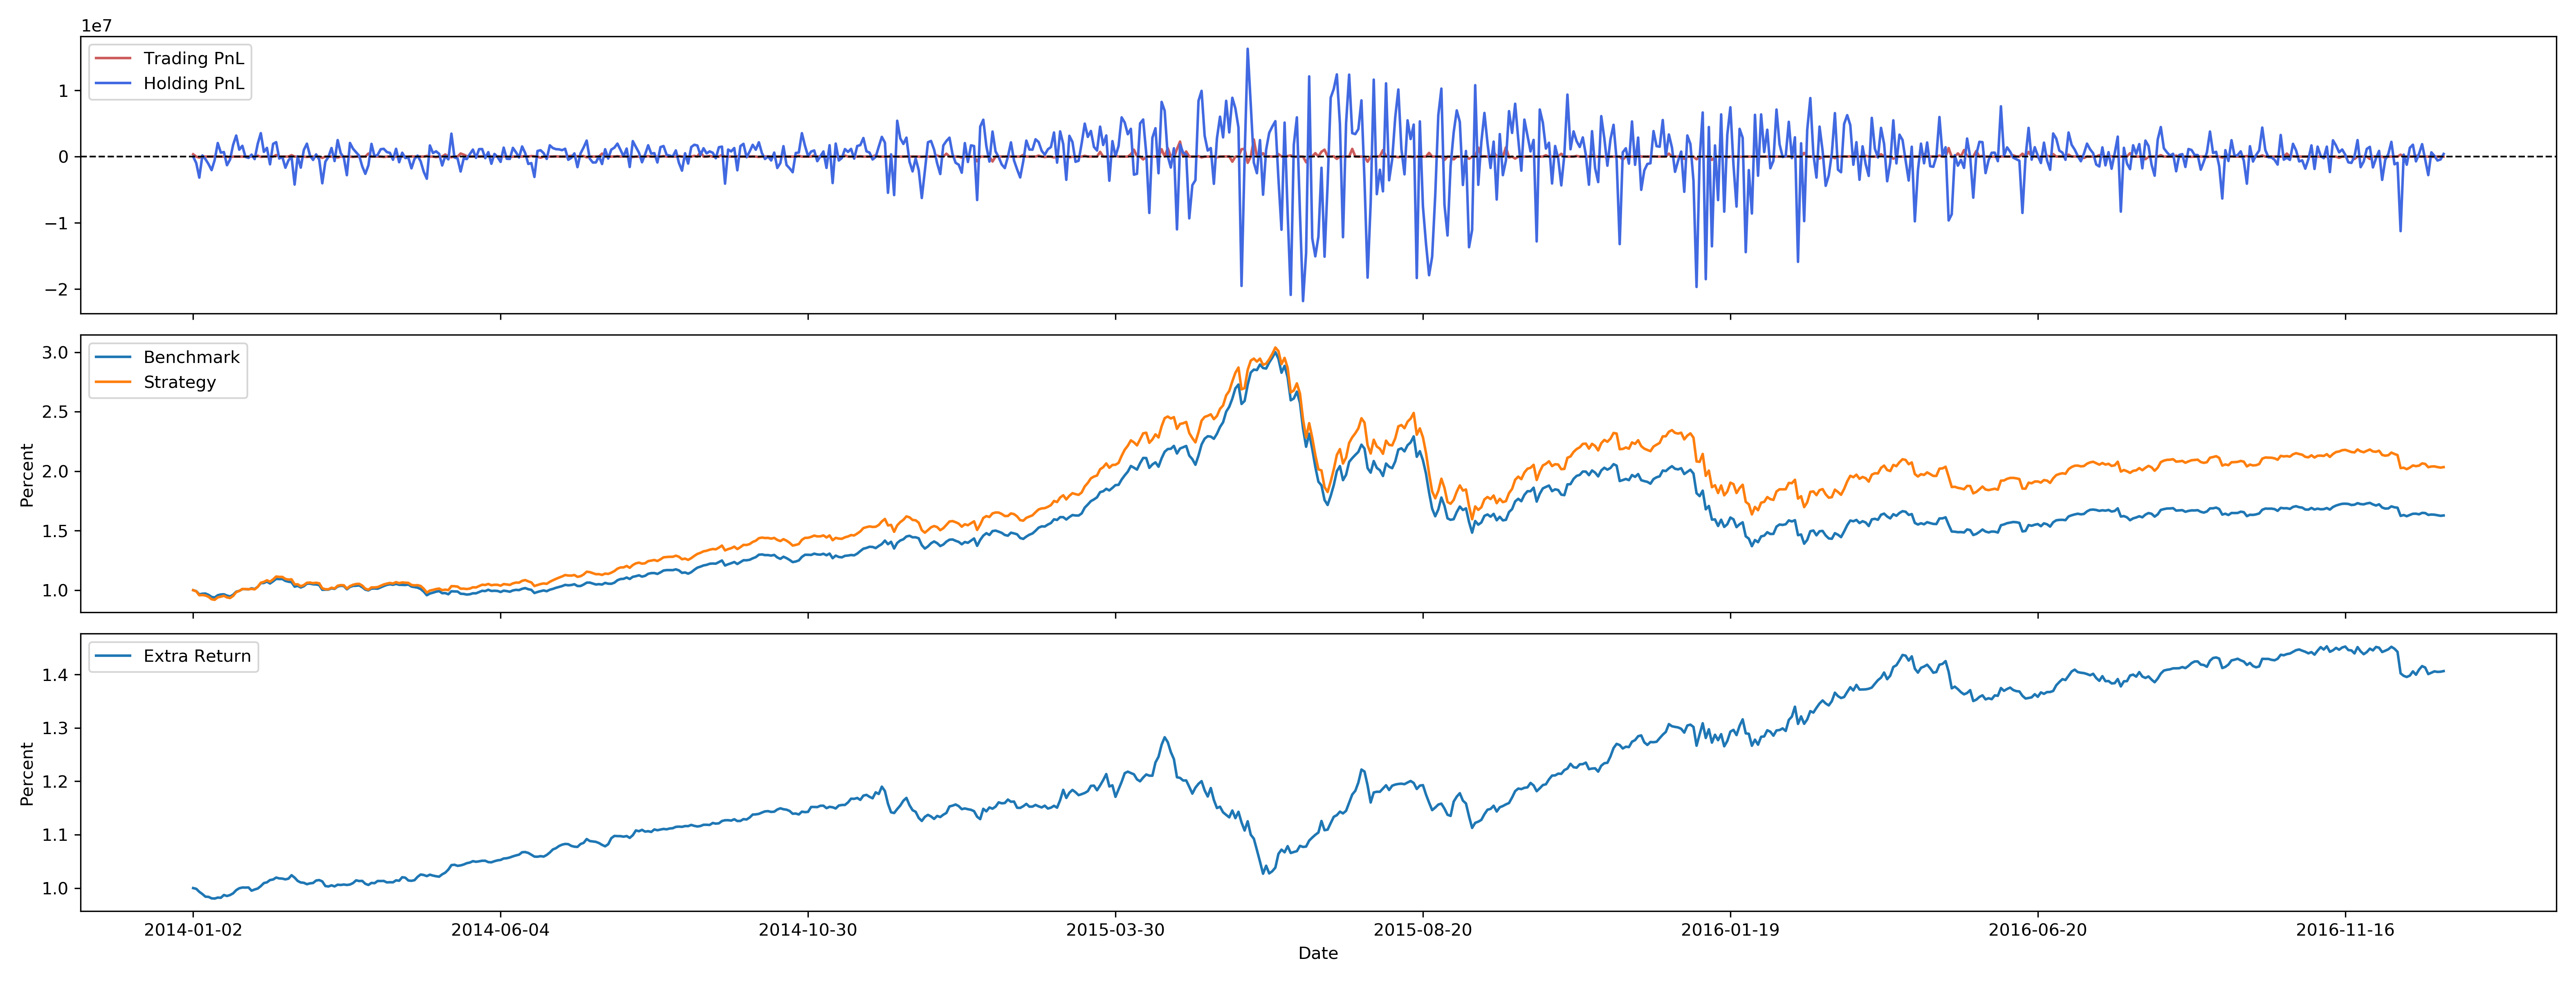

In [23]:
pnl_img = PIL.Image.open('pnl_img.png')
pnl_img

In [24]:
ta.metrics

{'beta': 0.9860486579299429,
 'sharpe': 1.1654721759513527,
 'yearly_return': 0.1202612781258825,
 'yearly_vol': 0.10318674319935224}